In [1]:
#import required libraries for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read csv
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_dataset.csv')
df.head()

,SWI,SWF,temperature,size,management,duration
0,0.59,1.30,3.5,0.5,2,20
1,1.21,1.85,4.6,47.2,3,19
2,1.08,0.97,4.8,53.3,4,22
3,1.60,1.67,5.2,27.2,8,20
4,2.95,2.41,5.7,38.8,6,22


In [3]:
#profiling the data
!pip install pandas-profiling
import pandas_profiling 

profile = pandas_profiling.ProfileReport(df)
# exporting  profile to html
profile.to_file("profile_report.html")

You should consider upgrading via the 'c:\users\csuftitan\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [4]:
# display the number of rows and columns
df.shape

(280, 6)

In [24]:
#check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SWI          280 non-null    float64
 1   SWF          280 non-null    float64
 2   temperature  280 non-null    float64
 3   size         280 non-null    float64
 4   management   280 non-null    int64  
 5   duration     280 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 13.2 KB


In [5]:
#check for duplicates
df.duplicated().sum()

0

In [23]:
#Check null values
df.isnull().sum()

SWI            0
SWF            0
temperature    0
size           0
management     0
duration       0
dtype: int64

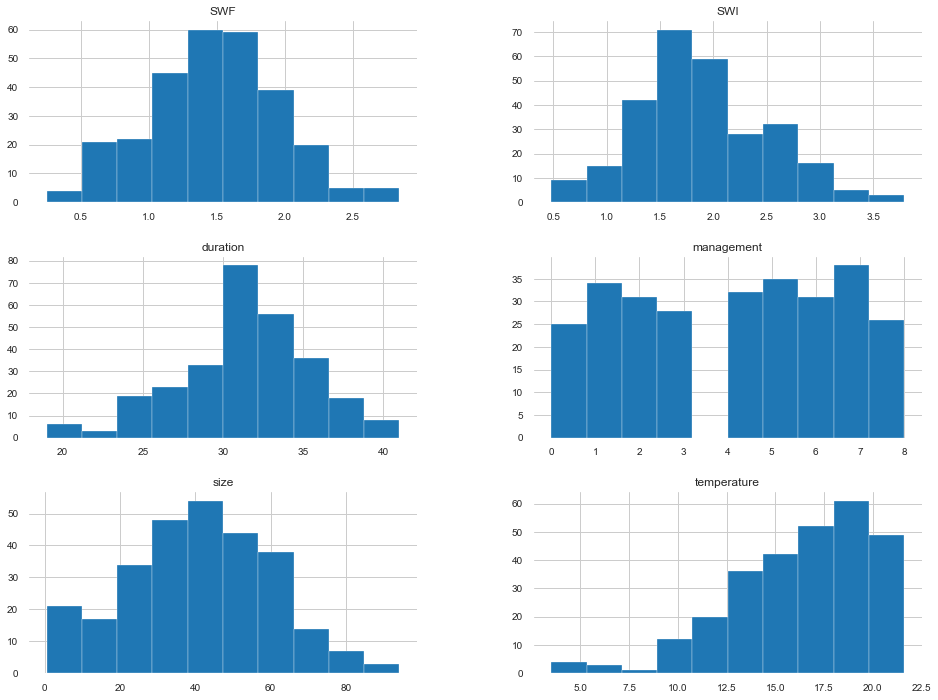

In [6]:
# check the distributions of all the variables
df.hist(bins=10, figsize=(16,12))
plt.show()

In [7]:
#find the correlation values among varibles
corr = df.corr()
corr

,SWI,SWF,temperature,size,management,duration
SWI,1.000000,0.680071,0.254698,-0.016571,0.300495,0.214081
SWF,0.680071,1.000000,-0.065078,0.004630,0.077577,-0.093165
temperature,0.254698,-0.065078,1.000000,0.006262,-0.007137,0.874055
size,-0.016571,0.004630,0.006262,1.000000,0.020412,-0.043318
management,0.300495,0.077577,-0.007137,0.020412,1.000000,-0.017970
duration,0.214081,-0.093165,0.874055,-0.043318,-0.017970,1.000000


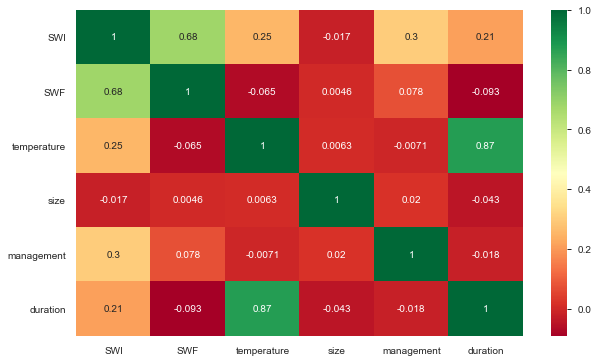

In [10]:
#draw a heatmap based on correlation values
fig, ax = plt.subplots(figsize=(10,6))  
sns.heatmap(corr, annot = True, cmap="RdYlGn")

In [12]:
# Splitting data into Input and Target Variable

y = df[['SWI']]  # target variable i.e SWI
X = df.drop(['SWI'], axis=1)  # input variables

In [13]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=2)

# Building the baseline model

In [15]:

# Building the Linear Regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()      
lr_baseline_model = lr.fit(X_train,y_train)

In [18]:
#predict values for test set
y_pred = lr_baseline_model.predict(X_test)
y_pred

array([[1.67702091],
       [0.83110001],
       [2.2670974 ],
       [1.63297974],
       [1.88926081],
       [2.09534665],
       [1.52484871],
       [1.89289493],
       [1.74431753],
       [1.89021003],
       [2.27804698],
       [1.59573237],
       [2.00891006],
       [1.55867498],
       [2.13286007],
       [1.77303372],
       [1.61992631],
       [2.08132612],
       [2.64263971],
       [2.66380814],
       [1.811981  ],
       [1.22063749],
       [1.99340259],
       [2.19263525],
       [1.06875109],
       [1.29997954],
       [2.38156233],
       [1.52126906]])

In [17]:
# Noting down accuracy of the baseline model
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.22633545997294227
0.07342119289377443
0.2709634530592169


In [20]:
#unseen test data
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_new_test_data.csv')


In [21]:
#predict values for test set
pred_bl = lr_baseline_model.predict(test_new)
pred_bl

array([[1.62989521],
       [1.98451792],
       [2.39401018],
       [2.68680152],
       [1.76061999],
       [3.18106094],
       [2.39932678],
       [2.30877904],
       [1.96165948],
       [1.95962163],
       [2.44795831],
       [2.19412359],
       [1.8864434 ],
       [2.97786382],
       [1.7171924 ],
       [2.07844156],
       [2.38637961],
       [1.90564131],
       [1.93582554],
       [1.98561732],
       [2.81545754],
       [1.73944741],
       [2.56958882],
       [2.29529617],
       [2.89631122],
       [2.37454234],
       [1.74827632],
       [2.02742106],
       [3.10741398],
       [1.62665201],
       [2.29705992],
       [2.03332485],
       [2.91419443],
       [2.79033169],
       [1.78501635],
       [2.86446632],
       [2.88887984],
       [2.44012344],
       [1.75271291],
       [1.79156154],
       [1.56199395],
       [2.58988789],
       [2.90601538],
       [2.86837236],
       [2.21773557],
       [2.76043993],
       [1.69349804],
       [2.092

In [22]:
res = pd.DataFrame(pred_bl)
#res.index = test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_Invertebrate.csv") 

# Let's apply some feature selection techniques on the dataset

# 1. Applying RFE

In [26]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= lr_baseline_model , step = 1) 
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument 

# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 2
Selected Features: [ True False False  True False]
Feature Ranking: [1 2 4 1 3]


c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,SWF,1
3,management,1
1,temperature,2
4,duration,3
2,size,4


In [29]:
# Transforming the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fitting our baseline model with the transformed data
lr_rfe_model = lr_baseline_model.fit(X_train_rfe, y_train)

In [30]:

# making predictions and evaluating the model
y_pred_rfe = lr_rfe_model.predict(X_test_rfe)

In [31]:
# Noting down accuracy of the baseline model
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred_rfe))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred_rfe))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe)))

0.3017029318302879
0.1253235783670183
0.35401070374639565


# 2. Applying feature  importance using xgboost

You should consider upgrading via the 'c:\users\csuftitan\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\csuftitan\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature Importances :  [0.21043688 0.19353174 0.16687407 0.22549774 0.20365962]


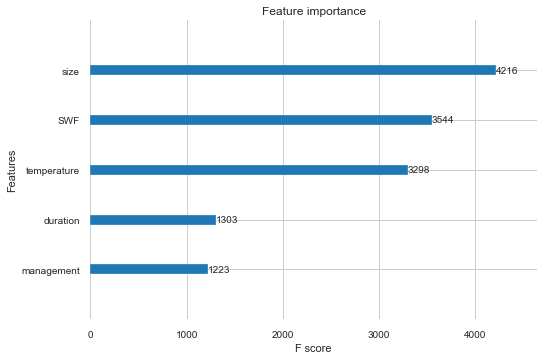

In [34]:
!pip install xgboost

from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [171]:
# Splitting data into Input and Target Variable

y = df[['SWI']]  # target variable i.e SWI
X = df.drop(['SWI', 'size'], axis=1)  # input variables

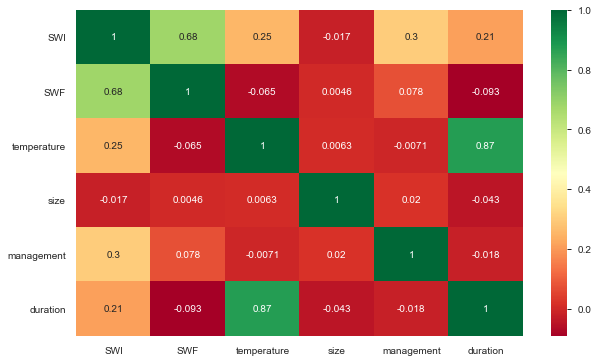

In [172]:
#draw a heatmap based on correlation values
fig, ax = plt.subplots(figsize=(10,6))  
sns.heatmap(corr, annot = True, cmap="RdYlGn")

In [173]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=2)

In [174]:

# Building the Linear Regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()      
lr_modified_model = lr.fit(X_train,y_train)

In [175]:
#predict values for test set
y_pred = lr_modified_model.predict(X_test)
y_pred

array([[1.67155047],
       [0.83263865],
       [2.29084226],
       [1.60022291],
       [1.8656446 ],
       [2.12496849],
       [1.51965876],
       [1.87497125],
       [1.74175391],
       [1.8948272 ],
       [2.25312016],
       [1.59820489],
       [2.01121187],
       [1.59010436],
       [2.11333855],
       [1.76218667],
       [1.63219098],
       [2.10763296],
       [2.64309283],
       [2.68220134],
       [1.83255041],
       [1.18883193],
       [1.98647236],
       [2.20395122],
       [1.06993919],
       [1.27899883],
       [2.38759597],
       [1.49865516]])

In [176]:
# Noting down accuracy of the baseline model
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.2256153453661347
0.07350861181551413
0.2711247163493475


In [177]:
#unseen test data
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_new_test_data.csv')


In [179]:
#predict values for test set
test_new_n = test_new.drop(['size'], axis=1)
pred_bl = lr_modified_model.predict(test_new_n)
pred_bl

array([[1.6095355 ],
       [1.96914578],
       [2.39013856],
       [2.68955624],
       [1.75982303],
       [3.19748338],
       [2.41326163],
       [2.3030655 ],
       [1.95352813],
       [1.96118287],
       [2.4326386 ],
       [2.20619756],
       [1.87067315],
       [2.97236031],
       [1.71894152],
       [2.08348846],
       [2.37734949],
       [1.91397522],
       [1.92690812],
       [1.98384719],
       [2.79803218],
       [1.76082092],
       [2.58556077],
       [2.26337454],
       [2.8768097 ],
       [2.37004991],
       [1.74586724],
       [2.01582507],
       [3.10799409],
       [1.6104079 ],
       [2.274306  ],
       [2.0307586 ],
       [2.9094195 ],
       [2.79546598],
       [1.76019204],
       [2.85473976],
       [2.87232808],
       [2.46824902],
       [1.73876289],
       [1.78645315],
       [1.5810152 ],
       [2.59506005],
       [2.88733828],
       [2.86764125],
       [2.23156496],
       [2.74193281],
       [1.67481291],
       [2.106

In [180]:
res = pd.DataFrame(pred_bl)
#res.index = test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_Invertebrate5.csv") 